In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

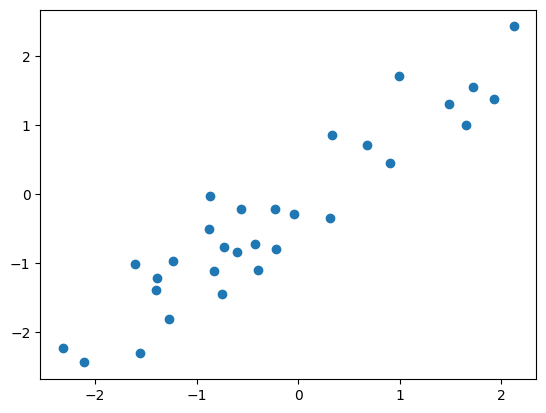

In [2]:
torch.manual_seed(42)

N = 30
x = torch.randn(N,1)
y = x + torch.randn(N,1)/2

plt.plot(x,y,'o')
plt.show()

### **Model**

In [4]:
ANNreg = nn.Sequential(
    nn.Linear(1,1),
    nn.ReLU(),
    nn.Linear(1,1)
)

print(ANNreg.state_dict())


OrderedDict({'0.weight': tensor([[0.5961]]), '0.bias': tensor([0.6798]), '2.weight': tensor([[-0.7252]]), '2.bias': tensor([-0.5339])})


In [5]:
learningRate = .05

lossfun = nn.MSELoss()

optimizer = torch.optim.SGD(ANNreg.parameters(), lr = learningRate)  

##torch.optim.SGD(model.parameters(), lr) creates an optimizer that updates all trainable parameters using stochastic gradient descent, moving weights in the direction that minimizes the loss function.

### **Initial Weights**

In [6]:
for name, param in ANNreg.named_parameters():
    print(name, param.data)

0.weight tensor([[0.5961]])
0.bias tensor([0.6798])
2.weight tensor([[-0.7252]])
2.bias tensor([-0.5339])


### **Training a Regression ANN**

In [7]:
numepochs = 500
losses = torch.zeros(numepochs)

for epochi in range(numepochs):

    ## Forward pass
    yHat = ANNreg(x)

    ## Compute the loss
    loss = lossfun(yHat,y)
    losses[epochi] = loss.item()
    
    ## Backpropagation
    optimizer.zero_grad()  ## It clears old gradients before computing new ones
    loss.backward()   ## PyTorch computes gradients of loss with respect to all variables with requires_grad=True
    optimizer.step()  ## It updates the weights

### **Final Weights**

In [8]:
for name, param in ANNreg.named_parameters():
    print(name, param.data)


0.weight tensor([[0.6635]])
0.bias tensor([1.3961])
2.weight tensor([[1.4596]])
2.bias tensor([-2.1494])


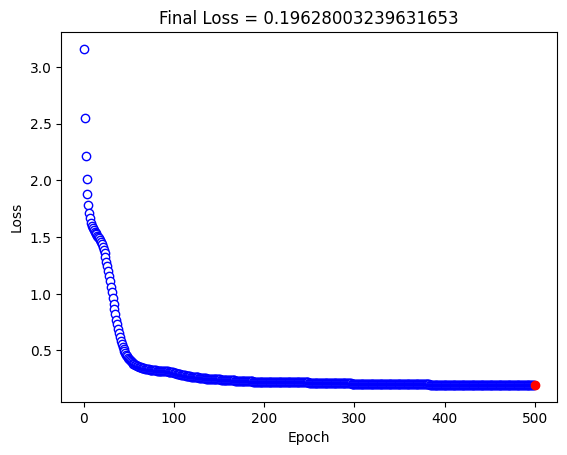

In [9]:
predictions = ANNreg(x)

testloss = (predictions-y).pow(2).mean()

plt.plot(losses.detach(), 'bo', mfc='w', lw=0.1)
plt.plot(numepochs,testloss.detach(), 'ro')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Final Loss = ' + str(testloss.item()))  
plt.show()


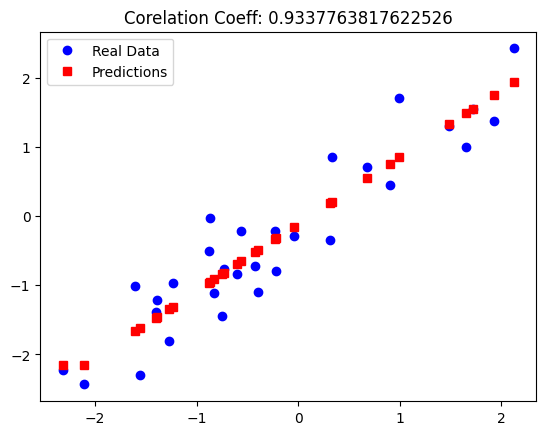

In [10]:
plt.plot(x,y,'bo', label='Real Data')
plt.plot(x,predictions.detach(), 'rs', label='Predictions')
plt.title("Corelation Coeff: " + str(np.corrcoef(y.T,predictions.detach().T)[0,1]))
plt.legend()
plt.show()